In [8]:
import sys
sys.path.append('/mnt/data01/Code/OtherRepos/surf2stl-python/')

import surf2stl
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

/tmp/ipykernel_1747353/641007481.py:12: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1,


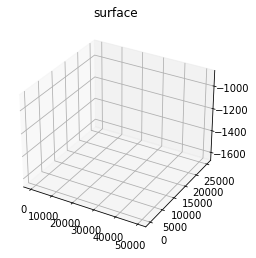

In [82]:
data_fn = '/mnt/NDH_data/Google_Drive2/Research_Projects/03_Thwaites_Grids/3D_Processing/US_Sectors/Upstream_Topography.nc'
topo = xr.open_dataset(data_fn)

# create x,y,z data for 3d surface plot
x = topo['local_x'].values
y = topo['local_y'].values
X, Y = np.meshgrid(x, y)
Z = topo['bed_elev'].values

# draw surface plot
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

#surf2stl.write('3d-sinusoidal.stl', X, Y, Z)

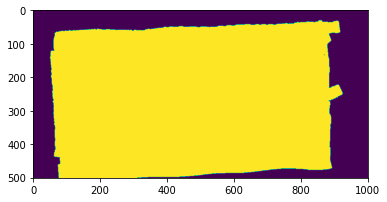

In [122]:
plt.imshow(search_grid)

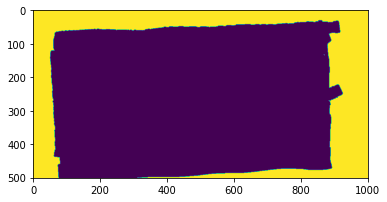

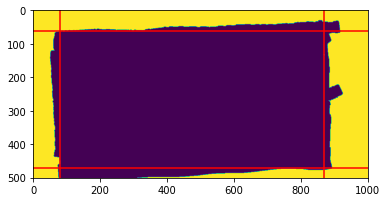

In [230]:
start_pix = [300,300]

rrange = []
crange = []

row_vals = np.where(search_grid[start_pix[1],:])[0]
ci1 = row_vals[row_vals < start_pix[0]][-1]+1
ci2 = row_vals[row_vals > start_pix[0]][0]-1
histvals = np.sum(search_grid[:,ci1:ci2],axis=1)
colvals = np.where(histvals > 0)[0]
ri1 = colvals[colvals < start_pix[1]][-1]+1
ri2 = colvals[colvals > start_pix[1]][0]-1

rrange= [ri1,ri2]
crange= [ci1,ci2]
area = (ri2-ri1)*(ci2-ci1)

counter = 1
for i in range(start_pix[0]-crange[0]-5):
        ci1 = crange[0]+counter
        ci2 = crange[1]
        histvals = np.sum(search_grid[:,ci1:ci2],axis=1)
        colvals = np.where(histvals > 0)[0]
        ri1 = colvals[colvals < start_pix[1]][-1]+1
        ri2 = colvals[colvals > start_pix[1]][0]-1
        newarea = (ri2-ri1)*(ci2-ci1)     
        counter = counter+1
        if newarea > area:
            area = newarea
            rrange= [ri1,ri2]
            crange= [ci1,ci2]  
            counter = 1
            
counter = 1          
for i in range(len(search_grid[start_pix[1],:])-crange[1]-5):    
    if i > 0:
        ci1 = crange[0]
        ci2 = crange[1]-i
        histvals = np.sum(search_grid[:,ci1:ci2],axis=1)
        colvals = np.where(histvals > 0)[0]
        try:
            ri1 = colvals[colvals < start_pix[1]][-1]+1
            ri2 = colvals[colvals > start_pix[1]][0]-1
        except:
            ri1 = 0
            ri2 = len(search_grid[0,:])
        newarea = (ri2-ri1)*(ci2-ci1)     
        counter = counter+1
        if newarea > area:
            area = newarea
            rrange= [ri1,ri2]
            crange= [ci1,ci2]      
            counter = 1
            
search_grid = np.isnan(topo['bed_elev'].values)
plt.imshow(search_grid)
plt.axhline(rrange[0],c='red')
plt.axhline(rrange[1],c='red')
plt.axvline(crange[0],c='red')
plt.axvline(crange[1],c='red')

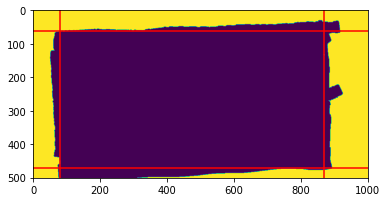

In [218]:
print(ci1,ci2)

885 885


In [132]:
row_vals[0:start_pix[0]]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50, 498,
        499, 500]),)

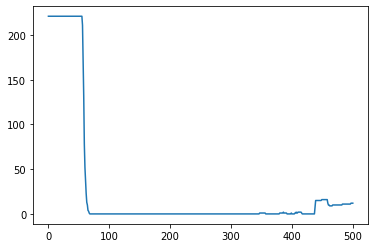

In [199]:
plt.plot(np.sum(search_grid[:,ci1:ci2],axis=1))

array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 26